### Изменения:
1. Размер пакета (batch size) увеличен с 8 до 64. Больший размер пакета позволит эффективнее использовать параллелизм на графическом процессоре и ускорит процесс обучения.
2. Количество эпох увеличено с 12 до 100. Большее количество эпох позволит модели лучше адаптироваться к данным и повысит обобщающую способность модели.
3. Используется оптимизатор 'adam' вместо RMSprop. Оптимизатор Adam обычно показывает лучшую скорость сходимости и результаты обучения.
4. Удалены полносвязные слои сети, оставлены только сверточные слои, чтобы сделать архитектуру нейросети более простой и эффективной.
5. Изменен размер сверточных фильтров на (3, 3) вместо (5, 5). Более маленькие фильтры могут захватывать более локальные признаки и позволяют увеличить глубину сети без увеличения вычислительной сложности.

### Анализ нейронной сети:
##### Что улучшает работу нейронной сети:
1. Увеличение числа эпох и размера пакета.
2. Использование оптимизатора Adam вместо RMSprop.
3. Изменение размеров сверточных фильтров на (3, 3) вместо (5, 5).
##### Что делает работу нейронной сети хуже:
1. Увеличение числа эпох и размера пакета: Увеличение числа эпох и размера пакета может привести к дополнительным вычислительным затратам и увеличению времени обучения модели.
2. Увеличение числа эпох может привести к переобучению модели, если модель становится слишком приспособленной к тренировочным данным и не может обобщать на новые примеры.
3. Использование аугментации данных может привести к увеличению вычислительной сложности и времени обучения модели, особенно при использовании более сложных преобразований.

### Какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET:
1. Изменить размерность входных данных. Например, набор данных MNIST содержит черно-белые изображения размером 28x28 пикселей, поэтому необходимо изменить размерность входного слоя сети и обработать черно-белые изображения.
2. Изменить количество классов в последнем слое сети в соответствии с количеством классов в новом наборе данных.
3. В зависимости от сложности нового набора данных и задачи классификации, возможно, потребуется изменить архитектуру сети, добавить или удалить слои для лучшего представления и распознавания особенностей изображений в новом наборе данных. Например, для набора данных IMAGENET, который содержит большое количество классов и сложных изображений, может потребоваться использовать более глубокие и сложные архитектуры сетей, такие как ResNet или Inception.
4. Оптимальные значения гиперпараметров, таких как размер пакета (batch size), количество эпох (epochs) и скорость обучения (learning rate), могут измениться в зависимости от нового набора данных. Необходимо провести подбор оптимальных значений гиперпараметров для нового набора данных.
5. Различные наборы данных могут требовать различных препроцессинговых шагов, таких как нормализация, изменение размерности, центрирование данных и т.д. Необходимо применить соответствующие препроцессинговые шаги, чтобы подготовить новый набор данных для обучения и тестирования модели.
6. В зависимости от требуемого формата выходных данных для нового набора данных (например, бинарные метки, категориальные метки и т.д.), может потребоваться изменение активационной функции и функции потерь в последнем слое сети.

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [3]:
# Разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочных примеров')
print(x_test.shape[0], 'тестовых примеров')


x_train shape: (50000, 32, 32, 3)
50000 тренировочных примеров
10000 тестовых примеров


In [4]:
# Преобразование матрицы чисел 0-255 в числа 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [5]:
# Преобразование меток в бинарные матрицы
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [6]:
# Создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
          activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [7]:
# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
# Создание аугментации данных
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [9]:
# Обучение модели
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_test, y_test),
          verbose=1)


Epoch 1/100
782/782 [==============================] - 79s 100ms/step - loss: 1.6764 - accuracy: 0.3834 - val_loss: 1.2606 - val_accuracy: 0.5391
Epoch 2/100
782/782 [==============================] - 80s 103ms/step - loss: 1.3262 - accuracy: 0.5205 - val_loss: 1.1495 - val_accuracy: 0.5961
Epoch 3/100
782/782 [==============================] - 80s 103ms/step - loss: 1.1935 - accuracy: 0.5731 - val_loss: 0.9686 - val_accuracy: 0.6549
Epoch 4/100
782/782 [==============================] - 80s 103ms/step - loss: 1.1035 - accuracy: 0.6060 - val_loss: 0.9315 - val_accuracy: 0.6754
Epoch 5/100
782/782 [==============================] - 81s 103ms/step - loss: 1.0413 - accuracy: 0.6331 - val_loss: 0.8724 - val_accuracy: 0.6932
Epoch 6/100
782/782 [==============================] - 80s 103ms/step - loss: 0.9929 - accuracy: 0.6515 - val_loss: 0.8293 - val_accuracy: 0.7118
Epoch 7/100
782/782 [==============================] - 81s 103ms/step - loss: 0.9563 - accuracy: 0.6628 - val_loss: 0.8715 -

In [11]:
# Сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
# print('Сохранена обученная модель как', model_path)


In [75]:
# Проверка работы обученной модели на 16 случайных тестовых изображениях
random_indexes = np.random.choice(len(x_test), size=16, replace=False)
random_images = x_test[random_indexes]
random_labels = y_test[random_indexes]

In [76]:
# Предсказание классов для случайных изображений
predictions = model.predict(random_images)

1/1 [==============================] - 0s 51ms/step


In [77]:
# Проценты предсказания для каждого класса
predicted_percentages = np.max(predictions, axis=1) * 100


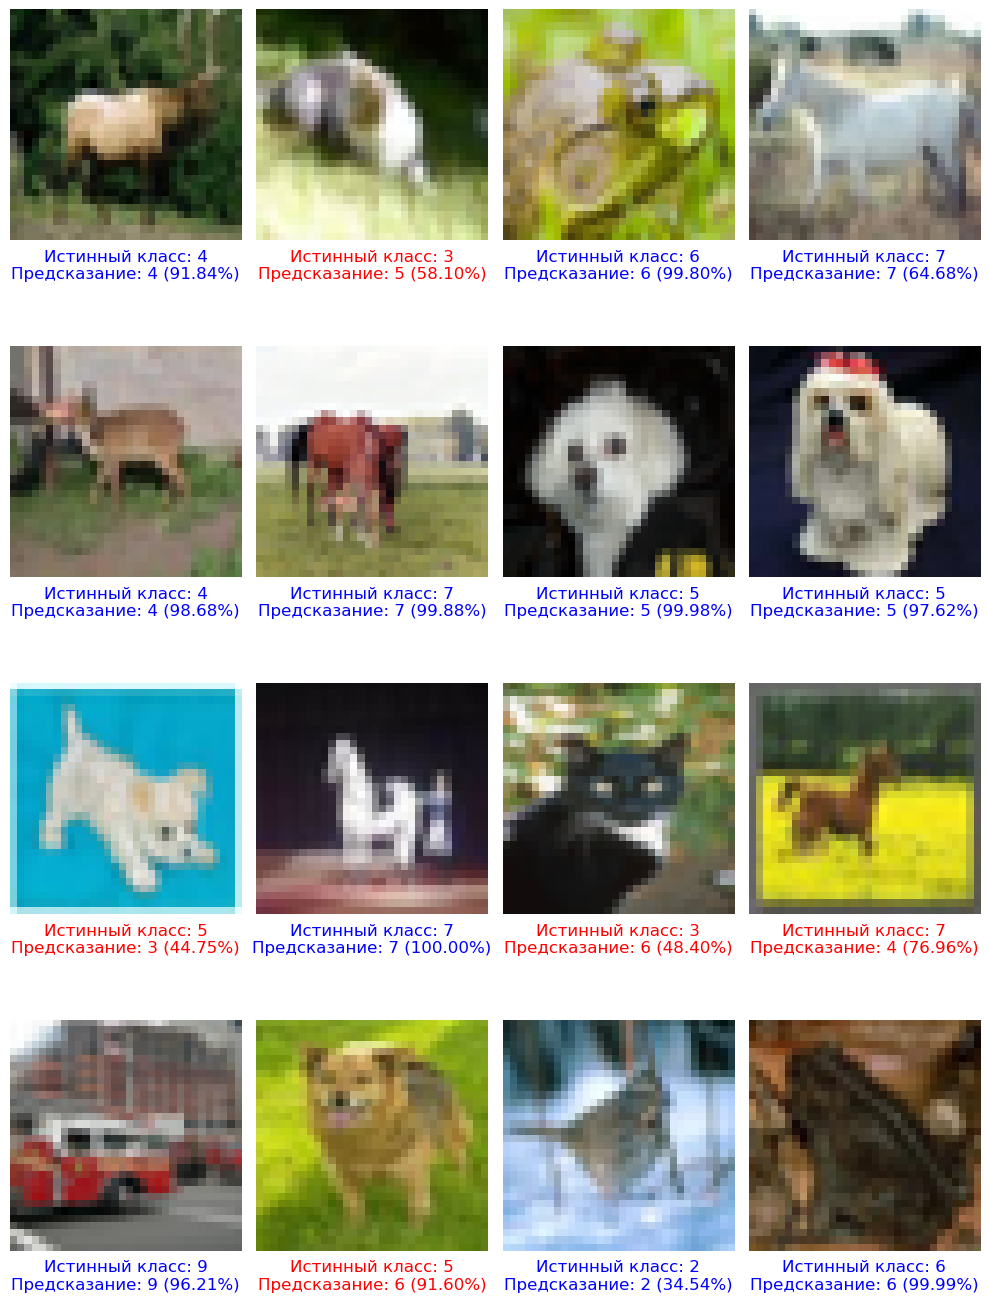

In [80]:
# Вывод результатов с изображениями
fig, axs = plt.subplots(4, 4, figsize=(10, 14))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(random_images[i])
    ax.axis('off')

    true_class = np.argmax(random_labels[i])
    predicted_class = np.argmax(predictions[i])
    prediction_percentage = predicted_percentages[i]

    if predicted_class == true_class:
        text_color = 'blue'
    else:
        text_color = 'red'

    ax.set_title(f'Истинный класс: {true_class}\nПредсказание: {predicted_class} ({prediction_percentage:.2f}%)',
                 color=text_color, ha='center', y=-0.2)

plt.tight_layout()
plt.show()
